# __IBM Data Science Capstone Project__

## _This project uses historical car accident and weather data to build a model that can predict the severity of an accident._

# __Part II Data Understanding__


## _Week 2 Assignment: Data_

_Instructions:_
In this phase, you need to collect or extract the dataset from various sources such as csv file or SQL database. Then, you need to determine the attributes (columns) that you will use to train your machine learning model. Also, you will assess the condition of chosen attributes by looking for trends, certain patterns, skewed information, correlations, and so on.

### _A description of the data and how it will be used to solve the problem_
The data used in this project contains 194,673 records of motor vehicle accidents and corresponding weather conditions. The date range for these accidents is from 2004-2020 in the United States. This dataset was provided by Coursea. 

This data will be used to find the most common accident conditions that cause severe personal injury and provide a reccomendation for where first responders should be located/focus patrols to reduce their travel time to an accident. 

The first step is to import the raw data file and the required libraries for initial data analysis and understanding.

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

#Import raw data from file
raw_collision_data = pd.read_csv('C:/Users/71062489/Documents/Personal/GitHub Projects/Data_Collisions.csv')
raw_collision_data.head()


C:\Users\71062489\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBJECTID,SEVERITYCODE,X,Y,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1,2,-122.323148,47.703140,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,2,1,-122.347294,47.647172,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,3,1,-122.334540,47.607871,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,4,1,-122.334803,47.604803,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,5,2,-122.306426,47.545739,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Methodology

The next step is to do some more refined data cleaning based on some initial analysis. First we want to get a feel for how the data looks and understand how the data needs to be cleansed to be usable for the model. Next, we want to understand which attributes most impact accident severity through use of data visualization and linear regression.

Outliers: PersonCount Column

count    194673.000000
mean          2.444427
std           1.345929
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          81.000000
Name: PERSONCOUNT, dtype: float64
The 95th percentile of persons involved in an accident is  5.0


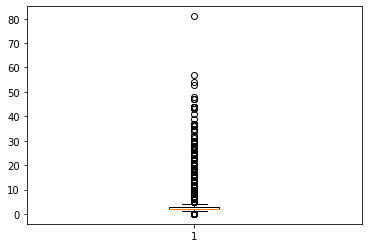

In [2]:
#Understand outliers of the PERSONCOUNT Column
the_95_percentile = raw_collision_data['PERSONCOUNT'].quantile(0.95)

print(raw_collision_data['PERSONCOUNT'].describe())

print("The 95th percentile of persons involved in an accident is ", the_95_percentile)

plt.boxplot(raw_collision_data['PERSONCOUNT'])
plt.show()

Based on the above analysis, it appears the PERSONCOUNT attribute contains a significant amount of outliers. We will need to remove these outliers in Part III of the project. 

Now, let's take a look at how weather conditions impact accident severity by creating a table of proportions for severity 1 and 2 accidents.

In [75]:
df_RoadConditions = raw_collision_data[['ROADCOND','SEVERITYCODE']]
df_RoadConditions_dummies = pd.get_dummies(df_RoadConditions.SEVERITYCODE, prefix='SEVERITY')
df_RoadConditions = pd.concat([df_RoadConditions, df_RoadConditions_dummies], axis=1)
df_RoadConditions = df_RoadConditions.drop(['SEVERITYCODE'], axis=1)
df_RoadConditions.set_index('ROADCOND', inplace=True)
df_RoadConditions  = df_RoadConditions.groupby(['ROADCOND']).sum()
df_transposed_rc = df_RoadConditions.transpose()

df_transposed_rc = (100. * df_transposed_rc / df_transposed_rc.sum()).round(1).astype(str) + '%'

df_transposed_rc

ROADCOND,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
SEVERITY_1,67.8%,77.4%,62.5%,67.4%,69.3%,83.4%,73.9%,95.0%,66.8%
SEVERITY_2,32.2%,22.6%,37.5%,32.6%,30.7%,16.6%,26.1%,5.0%,33.2%


In [80]:
df_Weather = raw_collision_data[['WEATHER','SEVERITYCODE']]
df_weather_dummies = pd.get_dummies(df_Weather.SEVERITYCODE, prefix='SEVERITY')
df_Weather = pd.concat([df_Weather, df_weather_dummies], axis=1)
df_Weather = df_Weather.drop(['SEVERITYCODE'], axis=1)
df_Weather.set_index('WEATHER', inplace=True)
df_Weather  = df_Weather.groupby(['WEATHER']).sum()
df_transposed_w = df_Weather.transpose()

df_transposed_w = (100. * df_transposed_w / df_transposed_w.sum()).round(1).astype(str) + '%'

df_transposed_w

WEATHER,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
SEVERITY_1,73.2%,67.8%,67.1%,86.1%,68.4%,40.0%,66.3%,72.0%,75.2%,81.1%,94.6%
SEVERITY_2,26.8%,32.2%,32.9%,13.9%,31.6%,60.0%,33.7%,28.0%,24.8%,18.9%,5.4%


In [81]:
df_LightCond = raw_collision_data[['LIGHTCOND','SEVERITYCODE']]
df_light_dummies = pd.get_dummies(df_LightCond.SEVERITYCODE, prefix='SEVERITY')
df_LightCond = pd.concat([df_LightCond, df_light_dummies], axis=1)
df_LightCond = df_LightCond.drop(['SEVERITYCODE'], axis=1)
df_LightCond.set_index('LIGHTCOND', inplace=True)
df_LightCond  = df_LightCond.groupby(['LIGHTCOND']).sum()
df_transposed_l = df_LightCond.transpose()

df_transposed_l = (100. * df_transposed_l / df_transposed_l.sum()).round(1).astype(str) + '%'

df_transposed_l

LIGHTCOND,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
SEVERITY_1,78.3%,73.6%,70.2%,63.6%,67.1%,66.8%,67.1%,77.9%,95.5%
SEVERITY_2,21.7%,26.4%,29.8%,36.4%,32.9%,33.2%,32.9%,22.1%,4.5%


By looking at the proportion of severity 1 and 2 accidents in different weather conditions, it appears that no weather condtion heavily increases the promotion of severity 2 accidents. The proportions are pretty much in line with the natural imbalance in the data between severity 1 and 2 accidents, which is 29% of the accidents are seveirty 2 and 71% of the accidents are severity 1. 

One thing that stands out is when weather is partly cloudly, it appears severity 2 accidents are significantly higher at 60% of the total accidents for that weather type. Perhaps cloudy weather is a good indicator for severity 2 accidents. 

Also, it appears that "unkown" weather, road, and light conditions are 95% severity 1 accidents. This makes sense because the weather was so mild the officer forgot to capture it in the report. Therefore, an accident with weather unknown is more likely to be a severity 1 accident. 

Next, let's look at the juntion type. 

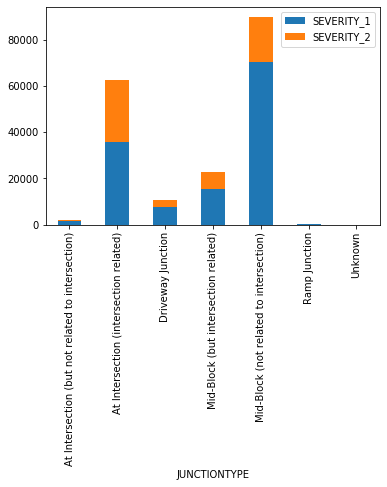

In [84]:
df_junctiontype = raw_collision_data[['JUNCTIONTYPE','SEVERITYCODE']]
df_junctiontype_dummies = pd.get_dummies(df_junctiontype.SEVERITYCODE, prefix='SEVERITY')
df_junctiontype = pd.concat([df_junctiontype, df_junctiontype_dummies], axis=1)
df_junctiontype = df_junctiontype.drop(['SEVERITYCODE'], axis=1)
df_junctiontype.set_index('JUNCTIONTYPE', inplace=True)
df  = df_junctiontype.groupby(['JUNCTIONTYPE']).sum()
df[['SEVERITY_1','SEVERITY_2']].plot(kind='bar', stacked=True)

Most accidents occur at a midblock or at an intersection. However, the proportion of severity 2 accidents is in line with the imbalance of the data. However, for "at intersection, intersection related", roughly 50% of the accidents are severity 2. Therefore, this location could be a good predictor of severity 2 accidents. 

Let's do the same analysis for collision type. 

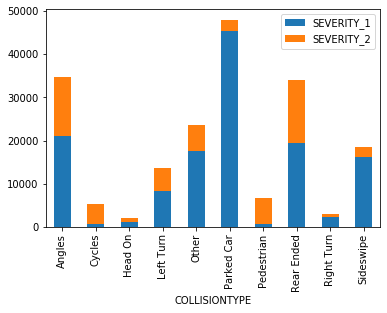

In [86]:
df_collisiontype = raw_collision_data[['COLLISIONTYPE','SEVERITYCODE']]
df_collisiontype_dummies = pd.get_dummies(df_collisiontype.SEVERITYCODE, prefix='SEVERITY')
df_collisiontype = pd.concat([df_collisiontype, df_collisiontype_dummies], axis=1)
df_collisiontype = df_collisiontype.drop(['SEVERITYCODE'], axis=1)
df_collisiontype.set_index('COLLISIONTYPE', inplace=True)
df  = df_collisiontype.groupby(['COLLISIONTYPE']).sum()
df[['SEVERITY_1','SEVERITY_2']].plot(kind='bar', stacked=True)



This graph gives us some good insights. It looks like nearly all accidents with a parked car, side swipes, and right turns are severity 1. This makes sense as they are most likely fender benders with cars moving at slow speed. 

Read ended and Angles show nearly half of accidents are severity 2. This is a little higher than the 29% proportion of severity 2 accidents. So these two types of accidents are fair predictors of severity 2 accidents. 

Lastly, cycles and pedestrian have overwhelmingly severity 2 accidents. This makes sense because these most likely involve a car hitting a person or a bike. 

Lastly, let's try to visualize the data geospatially using X,Y coordinates

In [191]:
#Remove data with no geocoordinate data
df_coordinates = raw_collision_data.dropna(subset=['X'])
limit = 100 #change limit...larger the limit the longer it takes to plot
df_coordinates = df_coordinates.iloc[0:limit, :]

In [178]:
#import folium
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')


Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [282]:
# define the world map centered around US
us_map = folium.Map(location=[47.6062, -122.3321], zoom_start=8)

# instantiate a feature group for the incidents in the dataframe
accidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_coordinates.Y, df_coordinates.X):
    accidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_coordinates.Y)
longitudes = list(df_coordinates.X)
#labels = list(df_coordinates.Category)

for lat, lng in zip(latitudes, longitudes):
    folium.Marker([lat, lng]).add_to(us_map)    
    
# add incidents to map
us_map.add_child(accidents)

It looks like the accident data is centered around the Seattle data. This is good to know for our model because perhaps our model can be extended to the data of other large US cities. 

Lastly, let's take a look at the accidents by severity description because our above analysis shows that the data is imbalanced. However, for our model, we want to prioritize accidents that have injured persons because those are the most important for first responders to get to. 

1    132400
2     55406
Name: SEVERITYCODE, dtype: int64


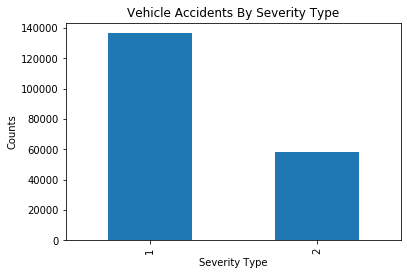

In [208]:
#See Accidents by Severity Description
df_address_type = raw_collision_data['SEVERITYCODE'].value_counts()
df_address_type.plot(kind="bar")
plt.title("Vehicle Accidents By Severity Type")
plt.xlabel("Severity Type")
plt.ylabel("Counts")

print(collision_data_persons_outlier['SEVERITYCODE'].value_counts())

Based on the above histogram, it looks like the data is unbalanced. We will need to fix this in the Part III of this project.  Please see part III for all data cleansing and determiniation of model variables.

## Results

After our initial analysis, we discovered that the person count column has some extreme outliers. We also discovered that weather does not appear to influence accident severity, with perhaps the exception of "Unkown" and "Cloudy" weather conditions. Next we discovered that "at intersection, intersection related" is an indicator of severity 2 accidents. Then, we discovered that accidents involving pedestrians or cyclists are extremely likely to be a severity 2 accident. Then, we plotted the data on the map. This indicated that the data is representative of large US cities. 

Finally, we quantified the imbalance in the data. 

In the next section, we will clean the data (removing outliers, NaN values, creating dummies, etc.) and we will balance the data so it can be usable for our model. Then, we will do linear regression with the cleaned data to determine if our initial analysis can be confirmed. 

## Discussions

We observed that weather does not necessarily impact accident severity. This is interesting because it could mean we don't necessarily need more first responders during poor weather. 

We observered that junction and collision type have a high impact on accident severity. These will need to be used in our model. Based on this observation, we reccomend that we also use Cycle Count, Person Count, and Vehicle Count in the model. Because if a cyclist or person is involved, very likely that it will be a severity 2 accident. 

We observed the data is located in Seattle, which helped us to identify the scope of our model and understand how it could be extended to other US cities. 

Lastly, we confirmed the data imbalance, which needs to be fixed before the model can be created. 

All data clean up is completed in Part III of this project. It has been completed below. 


## Conclusion

This concludes the initial data understanding and data prep as required for week 2. The following project parts will be completed in Week 3. 

# __Part III Data Preparation__

The data preparation includes all the required activities to construct the final dataset which will be fed into the modeling tools. Data preparation can be performed multiple times and it includes balancing the labeled data, transformation, filling missing data, and cleaning the dataset.

The second step is to complete some basic data cleansing so that it is ready for initial analysis. 

In [88]:
#Pre-pross The Data
#Drop Unecessary Columns 
#Dropping excess identifier columns not required for analysis. 
cleaned_collision_data = raw_collision_data.drop(['OBJECTID','EXCEPTRSNCODE','EXCEPTRSNDESC','INCKEY', 'COLDETKEY','REPORTNO','STATUS','SEVERITYCODE.1','INTKEY','SDOTCOLNUM','ST_COLCODE','INCDATE'], axis=1)

#Drop location Column as too specific for analysis
cleaned_collision_data = cleaned_collision_data.drop(['LOCATION'], axis=1)
cleaned_collision_data

#Convert Inattention Column to Boolean 1= not paying attention 0= paying attention
cleaned_collision_data["INATTENTIONIND"] = cleaned_collision_data["INATTENTIONIND"].fillna(0)
cleaned_collision_data.loc[(cleaned_collision_data['INATTENTIONIND'] == 'Y'),'INATTENTIONIND'] = 1

#Convert Speeding Column to Boolean 1=Speeding 0= Not Speeding
cleaned_collision_data["SPEEDING"] = cleaned_collision_data["SPEEDING"].fillna(0)
cleaned_collision_data.loc[(cleaned_collision_data['SPEEDING'] == 'Y'),'SPEEDING'] = 1
#cleaned_collision_data['SPEEDING'].value_counts()

#Convert Hit Parked Car Column to Boolean 1=Yes 0= No
cleaned_collision_data.loc[(cleaned_collision_data['HITPARKEDCAR'] == 'Y'),'HITPARKEDCAR'] = 1
cleaned_collision_data.loc[(cleaned_collision_data['HITPARKEDCAR'] == 'N'),'HITPARKEDCAR'] = 0

#Convert Pedestrian Right of Way to Boolean 1=Yes 0= No
cleaned_collision_data.loc[(cleaned_collision_data['PEDROWNOTGRNT'] == 'Y'),'PEDROWNOTGRNT'] = 1
cleaned_collision_data["PEDROWNOTGRNT"] = cleaned_collision_data["PEDROWNOTGRNT"].fillna(0)

#Convert Under Influence of Drugs/Alcohol to Boolean 1=Yes 0= No
cleaned_collision_data.loc[(cleaned_collision_data['UNDERINFL'] == 'Y'),'UNDERINFL'] = 1
cleaned_collision_data.loc[(cleaned_collision_data['UNDERINFL'] == '1'),'UNDERINFL'] = 1
cleaned_collision_data.loc[(cleaned_collision_data['UNDERINFL'] == 'N'),'UNDERINFL'] = 0
cleaned_collision_data.loc[(cleaned_collision_data['UNDERINFL'] == '0'),'UNDERINFL'] = 0
cleaned_collision_data["UNDERINFL"] = cleaned_collision_data["UNDERINFL"].fillna(0)

#Convert Severity from String to Boolean 1=Yes 0= No
cleaned_collision_data.loc[(cleaned_collision_data['SEVERITYDESC'] == '1'),'SEVERITYDESC'] = 1
cleaned_collision_data.loc[(cleaned_collision_data['SEVERITYDESC'] == '0'),'SEVERITYDESC'] = 0

#Convert Blank COLLISIONTYPE to Unknown
cleaned_collision_data["COLLISIONTYPE"] = cleaned_collision_data["COLLISIONTYPE"].fillna('Unknown')
#cleaned_collision_data["COLLISIONTYPE"].isnull().sum()

#Convert Blank WEATHER to Unknown
cleaned_collision_data["WEATHER"] = cleaned_collision_data["WEATHER"].fillna('Unknown')
#cleaned_collision_data["WEATHER"].isnull().sum()

#Convert Blank Road Contitions to Unknown
cleaned_collision_data["ROADCOND"] = cleaned_collision_data["ROADCOND"].fillna('Unknown')
#cleaned_collision_data["ROADCOND"].isnull().sum()

#Convert Blank Light Contitions to Unknown
cleaned_collision_data["LIGHTCOND"] = cleaned_collision_data["LIGHTCOND"].fillna('Unknown')
#cleaned_collision_data["LIGHTCOND"].isnull().sum()

#Convert Description to Unknown
cleaned_collision_data["ST_COLDESC"] = cleaned_collision_data["ST_COLDESC"].fillna('Unknown')
#cleaned_collision_data["ST_COLDESC"].isnull().sum()

#Convert Blank JuntionType to Unknown
cleaned_collision_data["JUNCTIONTYPE"] = cleaned_collision_data["JUNCTIONTYPE"].fillna('Unknown')
#cleaned_collision_data["JUNCTIONTYPE"].isnull().sum()

#Drop Rows that do not have an address type
cleaned_collision_data.dropna(subset = ["ADDRTYPE"], inplace=True)

cleaned_collision_data.head()

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
ROADCOND,,,,,,,,,,,,,,,,,,,,,
0,2,-122.323148,47.703140,Intersection,Injury Collision,Angles,2,0,0,2,...,0,Overcast,Wet,Daylight,0,0,Entering at angle,0,0,0
1,1,-122.347294,47.647172,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,...,0,Raining,Wet,Dark - Street Lights On,0,0,From same direction - both going straight - bo...,0,0,0
2,1,-122.334540,47.607871,Block,Property Damage Only Collision,Parked Car,4,0,0,3,...,0,Overcast,Dry,Daylight,0,0,One parked--one moving,0,0,0
3,1,-122.334803,47.604803,Block,Property Damage Only Collision,Other,3,0,0,3,...,0,Clear,Dry,Daylight,0,0,From same direction - all others,0,0,0
4,2,-122.306426,47.545739,Intersection,Injury Collision,Angles,2,0,0,2,...,0,Raining,Wet,Daylight,0,0,Entering at angle,0,0,0


Let's remove the PERSONCOUNT outliers using the trimming method.

Since 95% of the accidents involve 5 or less people. Let's remove any accident that involves 6 people or more. 

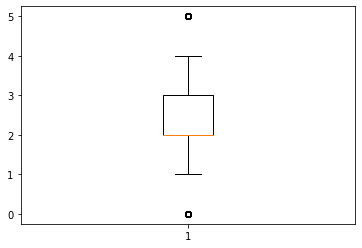

In [89]:
collision_data_persons_outlier = cleaned_collision_data[cleaned_collision_data['PERSONCOUNT'] < 6] 
plt.boxplot(collision_data_persons_outlier['PERSONCOUNT'])
plt.show()

The next step is to hot encode the following columns: ADDRTYPE, SEVERITYDESC, COLLISIONTYPE, WEATHER, ROADCOND, LightCOND

In [90]:
hot_encode_ADDRTYPE = pd.get_dummies(cleaned_collision_data.ADDRTYPE, prefix='ADDRTYPE')
#print(hot_encode_ADDRTYPE.head())

hot_encode_SEVERITYDESC = pd.get_dummies(cleaned_collision_data.SEVERITYDESC, prefix='SEVERITYDESC')
#print(hot_encode_SEVERITYDESC.head())

hot_encode_COLLISIONTYPE = pd.get_dummies(cleaned_collision_data.COLLISIONTYPE, prefix='COLLISIONTYPE')
#print(hot_encode_COLLISIONTYPE.head())

hot_encode_WEATHER = pd.get_dummies(cleaned_collision_data.WEATHER, prefix='WEATHER')
#print(hot_encode_WEATHER.head())

hot_encode_ROADCOND = pd.get_dummies(cleaned_collision_data.ROADCOND, prefix='ROADCOND')
#print(hot_encode_ROADCOND.head())

hot_encode_LIGHTCOND = pd.get_dummies(cleaned_collision_data.LIGHTCOND, prefix='LIGHTCOND')
#print(hot_encode_LIGHTCOND.head())


hot_encode_JUNCTIONTYPE = pd.get_dummies(cleaned_collision_data.JUNCTIONTYPE, prefix='JUNCTIONTYPE')
#print(hot_encode_JUNCTIONTYPE.head())
     


hot_encoded_collision_data = pd.concat([collision_data_persons_outlier,hot_encode_ADDRTYPE,hot_encode_SEVERITYDESC,hot_encode_COLLISIONTYPE,hot_encode_WEATHER,hot_encode_ROADCOND,hot_encode_LIGHTCOND,hot_encode_JUNCTIONTYPE],axis=1)
hc_collisiondata = hot_encoded_collision_data.drop(['ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE'], axis=1)
hc_collisiondata.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,SDOT_COLCODE,SDOT_COLDESC,...,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown
ROADCOND,,,,,,,,,,,,,,,,,,,,,
0,2.0,-122.323148,47.703140,2.0,0.0,0.0,2.0,3/27/2013 14:54,11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",...,0,0,0,0,1,0,0,0,0,0
1,1.0,-122.347294,47.647172,2.0,0.0,0.0,2.0,12/20/2006 18:55,16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",...,0,0,0,0,0,0,0,1,0,0
2,1.0,-122.334540,47.607871,4.0,0.0,0.0,3.0,11/18/2004 10:20,14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",...,0,0,0,0,0,0,0,1,0,0
3,1.0,-122.334803,47.604803,3.0,0.0,0.0,3.0,3/29/2013 9:26,11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",...,0,0,0,0,0,0,0,1,0,0
4,2.0,-122.306426,47.545739,2.0,0.0,0.0,2.0,1/28/2004 8:04,11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",...,0,0,0,0,1,0,0,0,0,0


Now it's time to balance the dataset. Since the data set has so many valid records, it makes sense to undersample the property damage class (Class 1) 

In [91]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = hc_collisiondata[hc_collisiondata.SEVERITYCODE==1]
df_minority = hc_collisiondata[hc_collisiondata.SEVERITYCODE==2]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=55406,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.SEVERITYCODE.value_counts()


2.0    55406
1.0    55406
Name: SEVERITYCODE, dtype: int64

Lastly, let's use Linear Regression with cleaned data to validate our inital learnings in section 2. 

In [277]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X = df_downsampled[['WEATHER_Blowing Sand/Dirt',\
 'WEATHER_Clear',\
 'WEATHER_Fog/Smog/Smoke',\
 'WEATHER_Other',\
 'WEATHER_Overcast',\
 'WEATHER_Partly Cloudy',\
 'WEATHER_Raining',\
 'WEATHER_Severe Crosswind',\
 'WEATHER_Sleet/Hail/Freezing Rain',\
 'WEATHER_Snowing',\
 'WEATHER_Unknown',\
 'ROADCOND_Dry',\
 'ROADCOND_Ice',\
 'ROADCOND_Oil',\
 'ROADCOND_Other',\
 'ROADCOND_Sand/Mud/Dirt',\
 'ROADCOND_Snow/Slush',\
 'ROADCOND_Standing Water',\
 'ROADCOND_Unknown',\
 'ROADCOND_Wet',\
 'LIGHTCOND_Dark - No Street Lights',\
 'LIGHTCOND_Dark - Street Lights Off',\
 'LIGHTCOND_Dark - Street Lights On',\
 'LIGHTCOND_Dark - Unknown Lighting',\
 'LIGHTCOND_Dawn',\
 'LIGHTCOND_Daylight',\
 'LIGHTCOND_Dusk',\
 'LIGHTCOND_Other',\
 'LIGHTCOND_Unknown']]

Y= df_downsampled["SEVERITYCODE"]
lm.fit(X,Y)
print(lm.coef_)
print(lm.intercept_)

[-2.83851414e+10 -2.83851414e+10 -2.83851414e+10 -2.83851414e+10
 -2.83851414e+10 -2.83851414e+10 -2.83851414e+10 -2.83851414e+10
 -2.83851414e+10 -2.83851414e+10 -2.83851414e+10  6.14055230e+10
  6.14055230e+10  6.14055230e+10  6.14055230e+10  6.14055230e+10
  6.14055230e+10  6.14055230e+10  6.14055230e+10  6.14055230e+10
 -5.60794412e+10 -5.60794412e+10 -5.60794412e+10 -5.60794412e+10
 -5.60794412e+10 -5.60794412e+10 -5.60794412e+10 -5.60794412e+10
 -5.60794412e+10]
23059059654.63159


A linear regression of different weather related conditions further prove what the proportions hinted at. That weather does not
necessarily have a large impact on accident severity. Therefore, we will exclude these from our initial model and perhaps only use it for tuning purposes.

In [92]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X = df_downsampled[['PEDCYLCOUNT','SPEEDING','INATTENTIONIND','UNDERINFL',\
 'COLLISIONTYPE_Head On','COLLISIONTYPE_Pedestrian','JUNCTIONTYPE_At Intersection (intersection related)',\
]]

Y= df_downsampled["SEVERITYCODE"]
lm.fit(X,Y)
print(lm.coef_)
print(lm.intercept_)

[0.45386495 0.14086088 0.10089298 0.12292821 0.2054827  0.44330194
 0.18970022]
1.3534076918871336


In the above linear regression, it appears that the variables that most impact accident severity is due to pedestrians,
cyclists, and junctiontype. This revalidates our initial analysis and therefore, all the above variables should be used in the model. 

# __Part IV Modelling__

In this phase, various algorithms and methods can be selected and applied to build the model including supervised machine learning techniques. You can select SVM, XGBoost, decision tree, or any other techniques. You can select a single or multiple machine learning models for the same data mining problem. At this phase, stepping back to the data preparation phase is often required.

# __Part V Evaluation__

Before proceeding to the deployment stage, the model needs to be evaluated thoroughly to ensure that the business or the applications' objectives are achieved. Certain metrics can be used for the model evaluation such as accuracy, recall, F1-score, precision, and others.

# _Part VI Deployment_

The deployment phase requirements vary from project to project. It can be as simple as creating a report, developing interactive visualization, or making the machine learning model available in the production environment. In this environment, the customers or end-users can utilize the model in different ways such as API, website, or so on.